In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from flarestack.data.icecube.public.all_sky_point_source.all_sky_3_year import ps_3_year
print(ps_3_year.get_seasons())

{'IC79-2010': <flarestack.data.icecube.public.PublicICSeason object at 0x114616cf8>, 'IC86-2011': <flarestack.data.icecube.public.PublicICSeason object at 0x114740240>, 'IC86-2012': <flarestack.data.icecube.public.PublicICSeason object at 0x1147401d0>}


In [2]:
ic86_2011 = ps_3_year.seasons["IC86-2011"]
print(ic86_2011)

In [3]:
exp_data = ic86_2011.get_exp_data()
print(exp_data.dtype.names)
print(exp_data)

('ra', 'dec', 'logE', 'sigma', 'time', 'sinDec', 'raw_sigma')
[(4.23461382, -0.39490169, 4.5508, 0.00268955, 55694.99190987, -0.38471744, 0.00268955)
 (4.8018947 ,  0.68259303, 2.9629, 0.01568178, 55694.99825263,  0.63080718, 0.01568178)
 (1.61364241,  0.08201302, 2.8691, 0.00839678, 55695.00023208,  0.08192111, 0.00839678)
 ...
 (4.19143263,  0.90237537, 2.7867, 0.05283286, 56062.4089819 ,  0.78480125, 0.05283286)
 (4.29163897,  0.6465293 , 3.4172, 0.01287878, 56062.41103019,  0.6024198 , 0.01287878)
 (6.05525752,  1.171184  , 2.8363, 0.00240157, 56062.41621634,  0.92121189, 0.00240157)]


We can plot the distribution of events as a function of declination. Due to IceCube's position at the south pole, and the fact that the Earth rotates, we expect uniformity in right ascension. Under the assumption that the data sample is background-dominated (as it is expected to contain <~0.1% astrophysical neutrinos), we can model our background using the experimental data. A 

Text(0.5, 1.0, 'Normalised data rate as a function of delination')

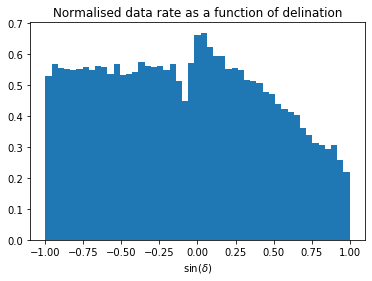

In [4]:
plt.hist(np.sin(exp_data["dec"]), bins=ic86_2011.sin_dec_bins, density=True)
plt.xlabel(r"sin($\delta$)")
plt.title("Normalised data rate as a function of delination")

The public datasets also include effective areas, binned in Neutrino Energy and sin(declination). We can fit a spline to these, to give a continuous function. Areas for which the effective area is zero are set to 10^-7, giving a continuous function in log space.

Saving to /Users/avocado/flarestack__data/output/dataset_plots/effective_area_plots/all_sky_3_year/IC86-2011.pdf


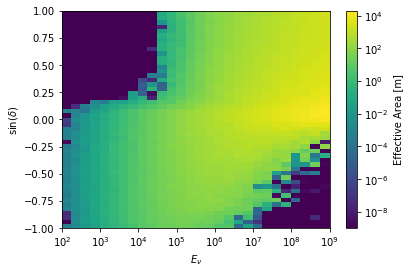

In [6]:
ic86_2011.plot_effective_area(show=True)